Importing relevant libraries

In [1]:
import nltk
from nltk import word_tokenize,sent_tokenize
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt') #Downloading punkt tokenizer model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('gutenberg') #Downloading gutenberg corpus(dataset)

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids() # returns a list containing all the file identifiers for the texts

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
len(gutenberg.fileids())

18

In [7]:
sent_tokenize(gutenberg.raw())[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [8]:
word_tokenize(sent_tokenize(gutenberg.raw())[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [9]:
gutenberg.sents() # returns a list of sentences

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [10]:
len(gutenberg.words())

2621613

In [11]:
input_data = gutenberg.sents()

In [12]:
model = Word2Vec(sentences=input_data, vector_size=64 , sg=1 , window=10, min_count=5, seed=123) #intialising word2vec model

In [13]:
vocab_size = len(model.wv.index_to_key) #counts no.of vocabulary words
print("Vocabulary size:", vocab_size)

Vocabulary size: 17011


checking similar words

In [14]:
model.wv.most_similar('suppose')

[('think', 0.8495671153068542),
 ('manage', 0.8066726326942444),
 ('shouldn', 0.8046374320983887),
 ('imagine', 0.7994616031646729),
 ('...', 0.7986536026000977),
 ('bet', 0.7927458882331848),
 ('Dreyfus', 0.7915643453598022),
 ('recollect', 0.790927529335022),
 ('anyhow', 0.7868796586990356),
 ('haven', 0.7802348732948303)]

In [15]:
model.wv.most_similar('she')

[('her', 0.8053408265113831),
 ('herself', 0.7816300392150879),
 ('Susan', 0.7593247294425964),
 ('Alice', 0.7551395893096924),
 ('Louisa', 0.7496132254600525),
 ('She', 0.7465255856513977),
 ('girl', 0.7254745364189148),
 ('Cecilia', 0.7102827429771423),
 ('Mary', 0.7055444121360779),
 ('Bab', 0.7003094553947449)]

In [16]:
model.wv.most_similar('month')

[('fifteenth', 0.8802589178085327),
 ('twelfth', 0.8700482249259949),
 ('fourteenth', 0.8689925670623779),
 ('year', 0.8630664348602295),
 ('eighth', 0.8554908633232117),
 ('Adar', 0.8459807634353638),
 ('twentieth', 0.8453441858291626),
 ('ninth', 0.8301632404327393),
 ('eleventh', 0.825990617275238),
 ('sixth', 0.8160669803619385)]

In [17]:
model.wv.most_similar('week')

[('fortnight', 0.8501124978065491),
 ('spend', 0.7883612513542175),
 ('twelvemonth', 0.7881894111633301),
 ('spent', 0.7816572785377502),
 ('Tuesday', 0.7806941270828247),
 ('Monday', 0.777543306350708),
 ('Saturday', 0.7764328122138977),
 ('weeks', 0.767156183719635),
 ('Harley', 0.7655326128005981),
 ('Wednesday', 0.7654795050621033)]

In [18]:
model.wv.doesnt_match('January sunday monday'.split())

'January'

In [19]:
model.wv.similarity('father','mother')

0.8652842

In [20]:
model.wv.similarity('king','queen')

0.66951346

In [21]:
model.wv.similarity('boy','girl')

0.6792507

son + woman - man = daughter

In [22]:
model.wv.most_similar(positive = ['son','woman'],negative=['man'])

[('Leah', 0.7285622358322144),
 ('daughter', 0.7257803678512573),
 ('Rebekah', 0.705981433391571),
 ('Rachel', 0.7059018611907959),
 ('wife', 0.7032545804977417),
 ('Bilhah', 0.698320746421814),
 ('Sarai', 0.6901575922966003),
 ('Hagar', 0.689933717250824),
 ('conceived', 0.6888585686683655),
 ('Milcah', 0.6868873238563538)]

In [23]:
model.wv['king'] #vector for a word king

array([-5.01876295e-01, -2.37299651e-01,  2.26676866e-01, -9.74644497e-02,
       -2.80990958e-01,  4.42572057e-01,  2.56666481e-01, -4.73623484e-01,
       -1.12648904e-01,  2.89021343e-01, -3.37185711e-01, -2.09401213e-02,
        1.59219027e-01,  4.30697739e-01,  6.09544143e-02, -2.90156007e-01,
       -2.64276654e-01, -1.61197290e-01,  1.00687814e+00,  5.35503030e-02,
        1.44284358e-02,  4.50084865e-01,  3.50852847e-01,  2.05214828e-01,
       -3.64669532e-01, -5.20248115e-01, -6.90301135e-02, -2.56328225e-01,
        4.54636365e-02, -4.34820205e-02,  2.50997841e-01, -3.15083237e-03,
        5.67250669e-01,  2.85153687e-01,  5.77192605e-01,  1.70082618e-02,
       -8.29462633e-02, -6.47141814e-01,  3.97346169e-01,  1.21303303e-02,
        1.83962598e-01, -7.28520572e-01, -1.24580443e-01, -2.24574536e-01,
        5.21404892e-02, -2.04807937e-01, -4.89297152e-01, -1.71108127e-01,
        6.07685506e-01, -7.08559304e-02,  2.22602606e-01, -1.81386381e-01,
       -4.27265763e-01, -

In [24]:
x = model.wv[model.wv.key_to_index.keys()] # Get the word vectors for all words in the vocabulary

In [25]:
tsne = TSNE(n_components=2, n_iter=250) # model for reducing the vector dimensionality to 2 using TSNE

In [26]:
x_2d = tsne.fit_transform(x) #fitting the model to the data

In [27]:
wv_df = pd.DataFrame(x_2d, columns=['x','y'])
wv_df['token'] = model.wv.index_to_key

In [28]:
wv_df.head(n=30)

,x,y,token
0,0.178653,-0.318163,","
1,0.177781,-0.379020,the
2,0.120725,-0.347760,and
3,-0.234368,-0.237969,.
4,0.141133,-0.380381,of
5,-0.029187,0.495327,:
6,-0.061484,-0.245597,to
7,-0.006384,-0.320898,a
8,0.150735,-0.396870,in
9,-0.347644,0.048049,I


<Axes: xlabel='x', ylabel='y'>

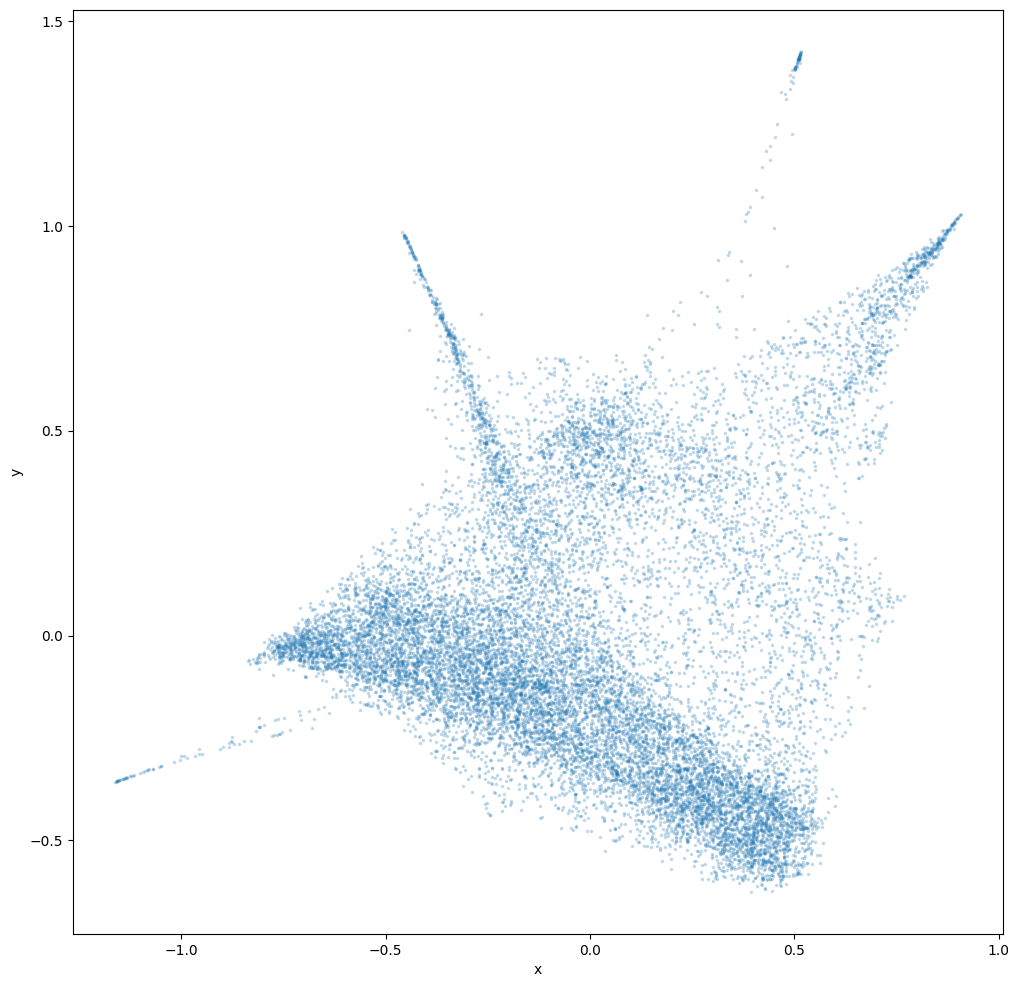

In [29]:
wv_df.plot.scatter('x','y', figsize=(12,12), marker='.', s=10, alpha=0.2) #plotting for 30 samples

In [30]:
output_notebook()

Loading BokehJS ...

The output_notebook() function is a convenience method provided by Bokeh that configures Bokeh to generate plots that are compatible with Jupyter notebooks.
Internally, it sets up Bokeh to output its plots directly into the notebook environment rather than generating standalone HTML files.

In [31]:
sub_wv_df = wv_df.sample(n=8000) #plotting for 8000 samples

In [32]:
p = figure(width = 800,height = 800)
_ = p.text(x=sub_wv_df.x, y=sub_wv_df.y , text=sub_wv_df.token)

In [33]:
show(p)